# Heart Failure Prediction

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Heart failure, also known as congestive heart failure, occurs when our heart muscle doesn't pump blood as well as it should. Certain conditions, such as narrowed arteries in our heart (coronary artery disease) or high blood pressure, gradually leave your heart too weak or stiff to fill and pump efficiently.



Not all conditions that lead to heart failure can be reversed, but treatments if started in time, can improve the signs and symptoms of heart failure and help us live longer. Lifestyle changes — such as exercising, reducing sodium in your diet, managing stress and losing weight — can improve our quality of life.

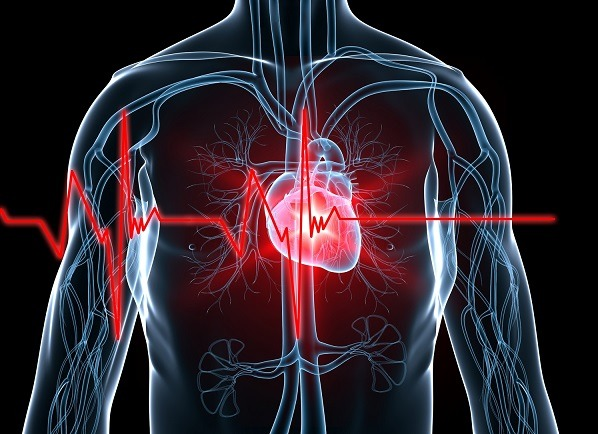


One way to prevent heart failure is to prevent and control conditions that cause heart failure, such as coronary artery disease, high blood pressure, diabetes or obesity.

Objective:
In this project, the objective was to create a model to predict mortality using several variables. 
Dataset heart_failure_clinical_records_dataset.csv was provided.


In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import MinMaxScaler

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot



#your info here
__author__ = "Jaya Sharma"
__email__ = "reply2jaya@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
#viewing the variables
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
#dataset consisted to 299 rows and 13 columns
df.shape

(299, 13)

### ---- 3 Clean the data ----

In [5]:
#Statistical summary of all the variables
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
#dataframe info on length of the dataset and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#check for duplicates in the dataset
df.duplicated().sum()

0

### Dataset:
    * There dataset had 299 rows and 13 columns.
    * Independent variables: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction,             high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking and time.
    * Dependent variable/ Target variable : DEATH_EVENT(0 - No, 1 - Yes).
    * Dataset did not include any duplicates or missing data.
    
    Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)



### ---- 4 Explore the data (EDA) ----

In [9]:
#calculating the rate of death event
df['DEATH_EVENT'].value_counts()/299

#this is a relatively balanced problem –– meaning we have quite a similarly distributed data in both classes. That's a Balanced classification problem

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

#### Based on the domain knowledge we hypothesized DEATH_EVENTS increases 

   * with age
   * with anaemia
   * with diabetes
   * with High_blood_pressure
   * with smoking
   
  #### These hypothesis were investigated in our analysis.

In [10]:
num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_col = ['DEATH_EVENT', 'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia']

### Univariate Analysis

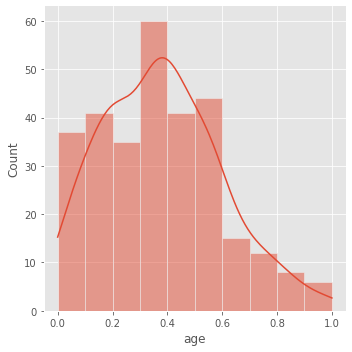

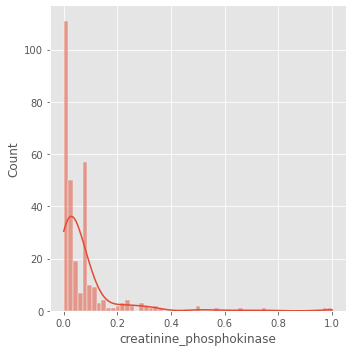

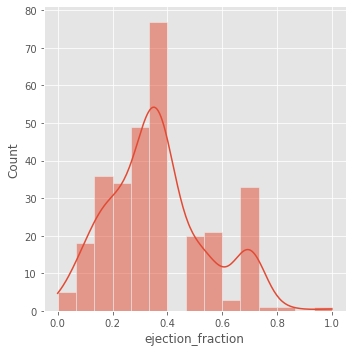

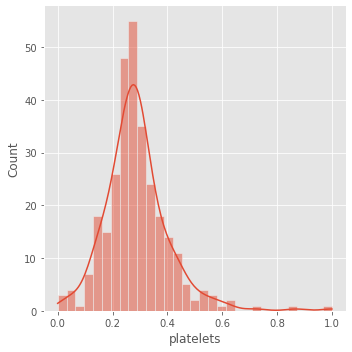

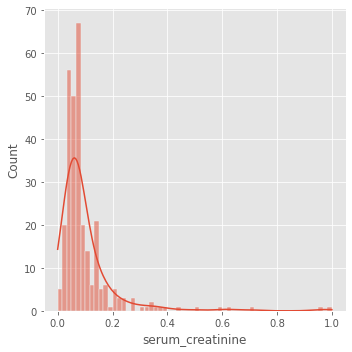

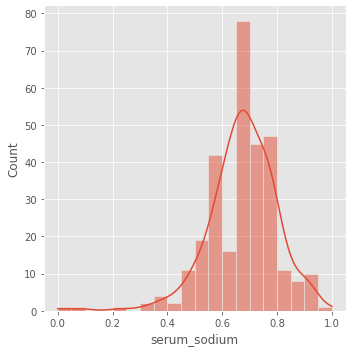

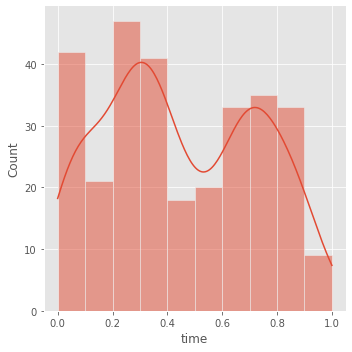

In [77]:
#first looking at distribution of numeric variables 

for cols in num_col:
        
        sns.displot(df, x = cols, kde = True)
        

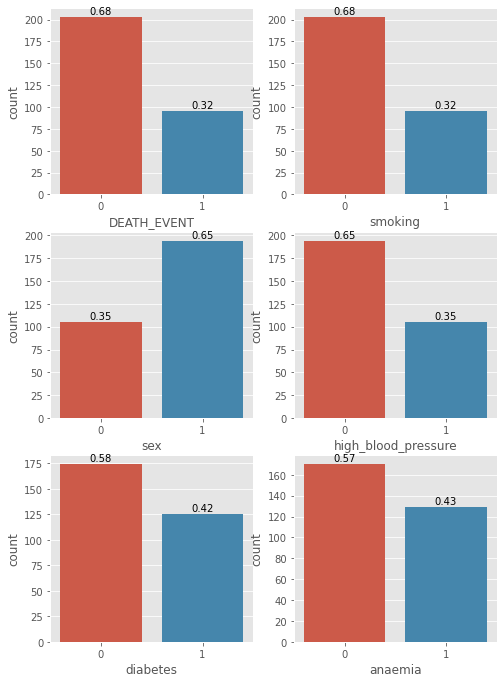

In [12]:
#looking at  Categorical Data  
plt.figure(figsize=(8, 24))
count = 1
for cols in cat_col:
    
    plt.subplot(6, 2, count)
    total = float(len(df))
    splot = sns.countplot(x=cols, data=df)
    count+=1
    for p in splot.patches:
        height = p.get_height()
        splot.text(p.get_x() + p.get_width()/2., 
                   height + 3, '{:1.2f}'.format(height/total), 
                   ha = 'center')

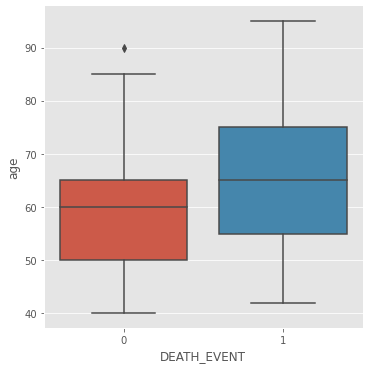

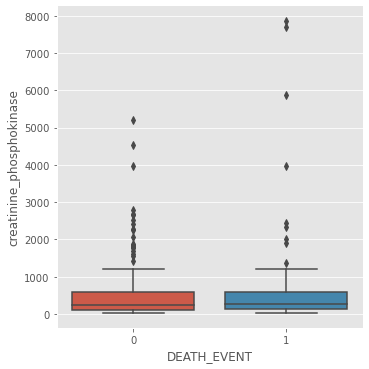

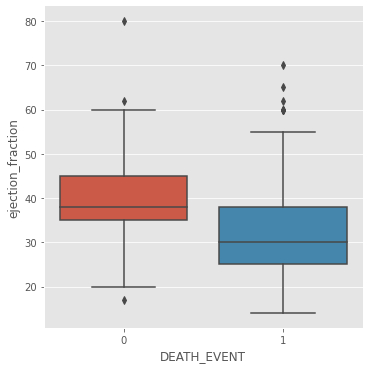

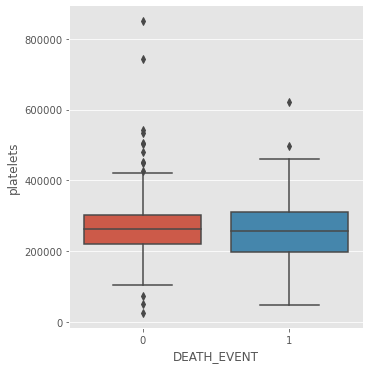

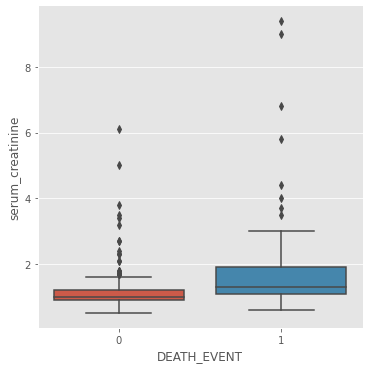

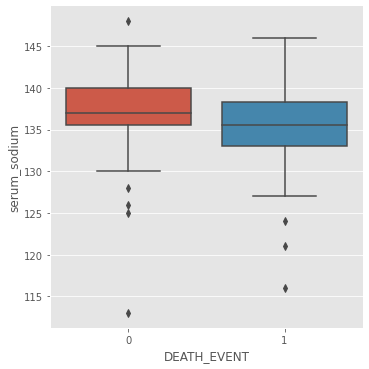

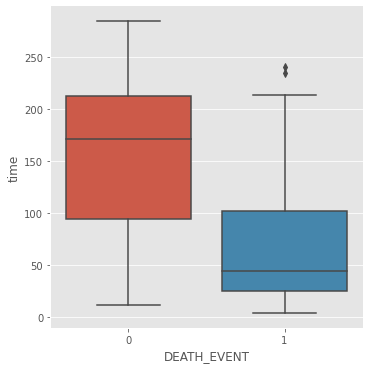

In [13]:
for cols in num_col:
        sns.catplot(data=df, y = cols, x = df['DEATH_EVENT'], kind = 'box')

### Summary 
    * People above 80 tend to have more death_event.
    * People with low ejection fraction,i.e. less than 30 tend to have more death_event.
    * Serum_sodium levels was found to be lower in deceased patients than alive.
    * Patient who survived had more time (follow up period) than deceased patients. It could have been that patient who died were in more serious condition and hence went frequently shortening their follow up time. 

<AxesSubplot:xlabel='smoking', ylabel='count'>

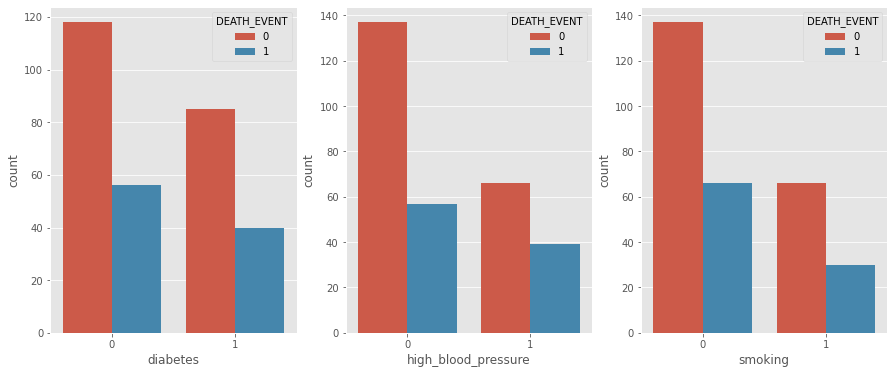

In [14]:
#Relationship between binary variable and target variable
f, axes = plt.subplots(ncols=3, figsize=(15,6))
#Death_Event among gender
sns.countplot(data = df, x= df['diabetes'], hue = 'DEATH_EVENT', ax=axes[0])

sns.countplot(data=df, x= df['high_blood_pressure'], hue = 'DEATH_EVENT', ax = axes[1])

sns.countplot(data = df, x= df['smoking'], hue = 'DEATH_EVENT', ax=axes[2])

Death event is more seen among patients with anaemia and High blood pressure. Other variables like gender, smoking habbit or diabetes do not show any association with target variable.

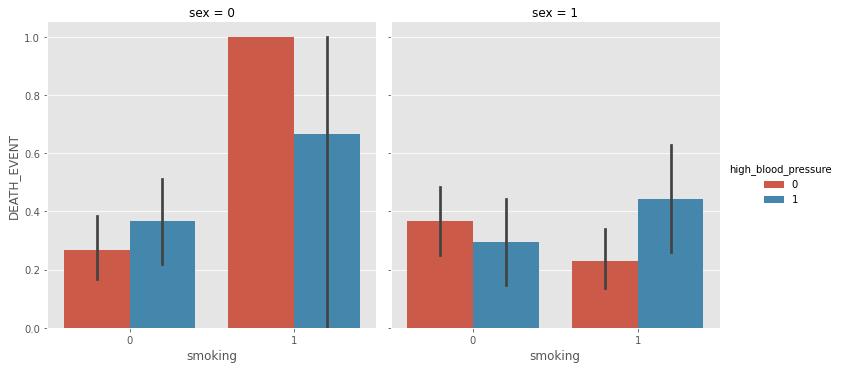

In [15]:

sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=df,col='sex',hue='high_blood_pressure')

On analysing the high blood pressure and smoking and their correlation with multiple variables,

    * Death Event is greatly increased among  smoking females compared to non smoking Females. If they have high blood pressure Death event is  increased too.
    * Death Event is increased among smoking males if they also suffer from high blood pressure.

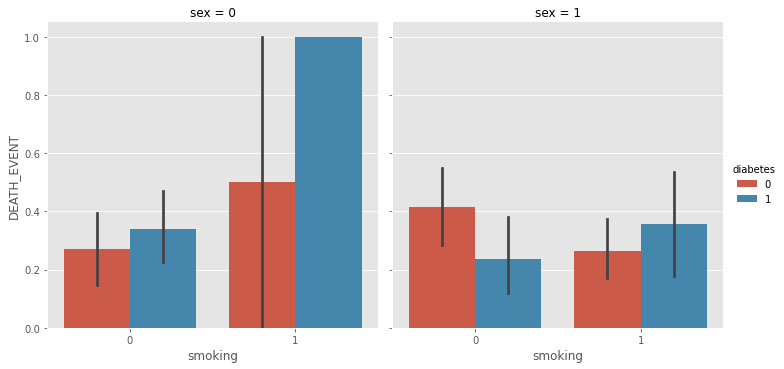

In [16]:
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=df,col='sex',hue='diabetes')

* This plot shows if a female is smoking and has diabetes, death event probability is much more compared to non smoking female.
* In the smoking male population, diabetes increases death probability.

In [17]:
#Correlation study
corr=df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

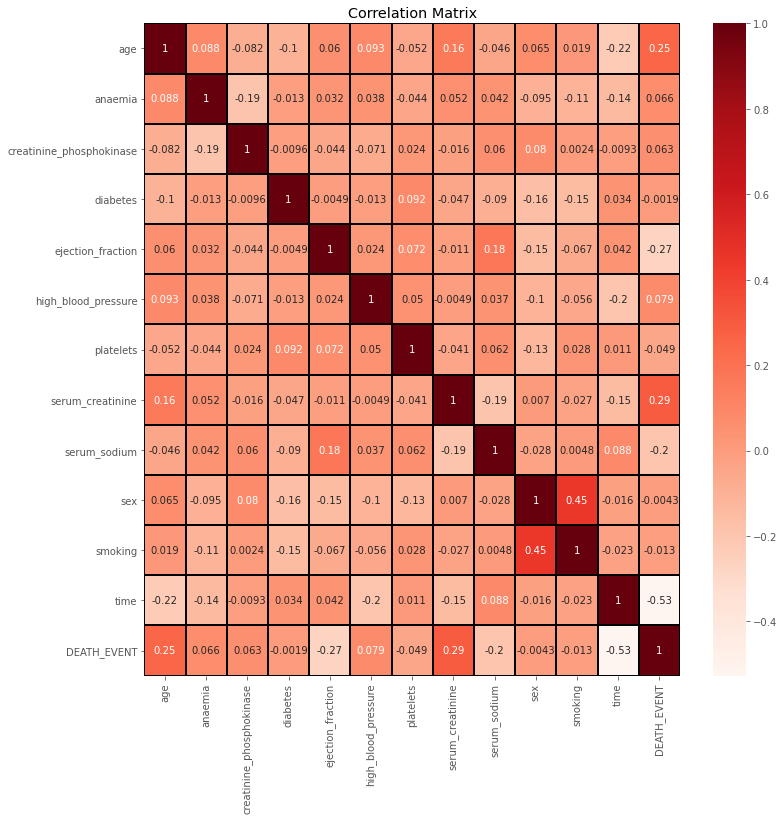

In [18]:
#plot heatmap
plt.figure(figsize=(12,12))
s=sns.heatmap(corr, xticklabels = df.columns, yticklabels = df.columns, cmap= 'Reds', annot = True,linewidths = 1, linecolor = 'black')
s.set_title('Correlation Matrix')

Heat map summary:
* Time, Ejection fraction showed negative correlation.
* Age,serum creatinine and high blood pressure showed positive correlation.
* Diabetes, platelets, sex, smoking variables did not show any correlation.

In [19]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## Part 3 - DEVELOP


### ---- 5 Feature Engineering ----

In [20]:
#scaling numeric variables for further analysis to improve model performance

mms = MinMaxScaler()

df[['age','ejection_fraction','platelets','serum_creatinine','time','serum_sodium','creatinine_phosphokinase']] = mms.fit_transform(df[['age',
                                'ejection_fraction','platelets','serum_creatinine','time','serum_sodium','creatinine_phosphokinase']])

In [21]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1
5,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,1,1,0.014235,1
6,0.636364,1,0.028451,0,0.015152,0,0.123530,0.078652,0.685714,1,0,0.021352,1
7,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,1,1,0.021352,1
8,0.454545,0,0.017096,0,0.772727,0,0.288833,0.112360,0.714286,0,0,0.021352,1
9,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,1,1,0.021352,1


In [22]:
#creating independent features dataframe for modelling
df_x = df.drop(['DEATH_EVENT'], axis=1)

In [23]:
#creating dependent feature df for modelling
df_y = df['DEATH_EVENT']

In [24]:
#split training data
x_train,x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 5)

### ---- 6 Models Selection ----

 After we had splitted dataset into train and test sets, we created machine learning model in training set, and then  tested in test dataset.
 Following different machine learning models will be used to create our model,
1. Logistic Regression: Easier and simpler and very efficient to train.

3. RandomForest Classifier: Random Forest is robust, accurate, efficient, and relatively quick to develop.

4. GradientBoosting Classifier: Gradient boosting is an ensemble of decision trees algorithms.


We will begin with logistic Regression model as a baseline.

### ---- 7 Establish a baseline ----

### Baseline - Logistic Regression

In [25]:
#for baseline model logistic regression with default parameters was chosen and evaluated.
lr_baseline=LogisticRegression().fit(x_train,y_train)

In [26]:
predict_lgr = lr_baseline.predict(x_test)
predict_lgr

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
# Print Confusion Matrix for baseline Logistic Regression model
cmlr_baseline = metrics.confusion_matrix(y_test, predict_lgr)

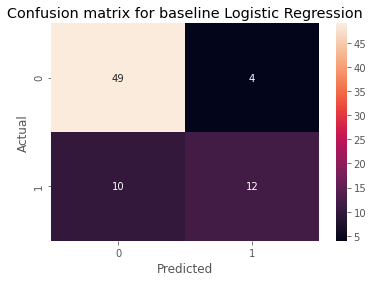

In [35]:
#Visualizing confusion matrix and evaluating model using confusion matrix and accuracy.
sns.heatmap(cmlr_baseline, annot=True)
plt.title("Confusion matrix for baseline Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### True Negative: 
True negative represents the value of correct predictions of negatives out of actual negative cases. 
49 Patients were correctly precticted as alive.
### True Positive: 
True positive represents the value of correct predictions of positives out of actual positive cases.
12 Patients were correctly precticted as dead.
### False Negative: 
False negative represents the value of incorrect negative predictions. 
10 Patients were incorrectly predicted as alive when they were actually dead.
### False Positive: 
False positive represents the value of incorrect positive predictions.
4 Patients were incorrectly predicted as dead when they were actually alive.


In [36]:
#The classification report for baseline Logistic regression model
print ("\n\n ---Logistic Regression Model---") 
print(metrics.classification_report(y_test, predict_lgr,target_names = ['0 No Death', '1 Death ']))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

  0 No Death       0.83      0.92      0.88        53
    1 Death        0.75      0.55      0.63        22

    accuracy                           0.81        75
   macro avg       0.79      0.73      0.75        75
weighted avg       0.81      0.81      0.80        75



The accuracy of baseline model was 81%. As this baseline model prediction was simply based on  default parameters without model tuning, next we  did Hyperparameter tuning and cross validation to improve the model scores before selecting the final best model.

## Logistic Regression

In [37]:
#Creating parameters for logistic regression Hyperparameter tuning
#create logistic regression

parameters_lr = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'penalty':['none','l1','l2','elasticnet'],
                      'C':[1,2,3,4,5,0.01,0.1]}
lr = LogisticRegression()

In [38]:
#Finding the best parameters through Grid search
#create  grid search using 5 fold cross validation

grid = GridSearchCV(lr, parameters_lr, cv=5,  n_jobs=-1)

#conduct and fit grid search
Logistic_best = grid.fit(x_train, y_train)

In [39]:
#View Hyperparameter Values Of Best Model
print("The best hyper parameters for Logistic regression are: {}".format(Logistic_best.best_params_))
print("The cross val score using the best hyper parameters for  Logistic regression is: {}".format(Logistic_best.best_score_))

The best hyper parameters for Logistic regression are: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
The cross val score using the best hyper parameters for  Logistic regression is: 0.8346464646464646


In [40]:
#Fitting the best parameters for logistic regression
Logistic_best.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 0.01, 0.1],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [41]:
# predictions of target vector by logistic model
predict_lr = Logistic_best.predict(x_test)
predict_lr

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
# Print Confusion Matrix for Logistic Regression model
cm = metrics.confusion_matrix(y_test, predict_lr)

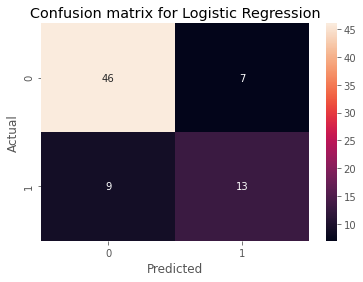

In [43]:
#Visualizing confusion matrix
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
#The classification report for Logistic regression model
print ("\n\n ---Logistic Regression Model---") 
print(metrics.classification_report(y_test, predict_lr,target_names = ['0 No Death', '1 Death ']))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

  0 No Death       0.84      0.87      0.85        53
    1 Death        0.65      0.59      0.62        22

    accuracy                           0.79        75
   macro avg       0.74      0.73      0.74        75
weighted avg       0.78      0.79      0.78        75



####  Precision:
Model Precision score is model's ability to correctly predict the actual positives out of all positive predictions made. Mathmatically its represented as:
Precision = True Positive/(True Positive + False Positive)

#### Recall:
Model Recall score is model's ability to correctly predict the positives out of actual positives. 
Mathmatically its represented as:
Recall = True Positive/(True Positive + False Negative)

#### F1 score: 
Model's F1 score is a function of precision and recall score. This is considered very useful measure in the scenarios where we try to optimize either precision or recall score and as a result, the model performance suffers. In our case, optimizing for precision helps with correctness if the patient is dead. However this comes at the cost of missing dead patient more frequently (high False Negatives).

Optimizing for recall helps with minimizing the chance of missing dead patients. However, this comes at the cost of predicting patients dead even though patient is alive (a high number of FP). 

Mathmatically its represented as:
F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

F1-score is harmonic mean of precision and recall score and is used as a metrics in the conditions where choosing either the precision score or recall score  results in compromise giving high false positives and false negatives respectively.

#### Accuracy:
Model accuracy score is model's ability to correctly predict both the positives and negatives out of all predictions. Mathmatically its represented as:
Accuracy Score = (True Positive + True Negative)/ (TP + FN + TN + FP)



In our Logistic Regression model, we saw 7 patients are false positives (predicted to be dead when they are alive) and 9 are false negatives (predicted alive when they are dead). 


Confusion matrix for Logistic Regression model showed 7 false positive cases and accuracy of 79%.

## Random Forest

In [45]:
#Create hyperparameters for random forest hyperparameter tuning
parameters_rf={
    'n_estimators':np.arange(100,1000,100),
    'max_features' : ['auto','sqrt'],
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(1,10),
    'criterion':['gini', 'entropy'],
   
}

In [46]:
#create Random forest 
rf = RandomForestClassifier()

In [47]:
#Finding the best parameters through Grid search
#create  grid search using 3 fold cross validation

grid_RF = GridSearchCV(rf, parameters_rf, cv=3,  n_jobs=-1)

#conduct and fit grid search
RF_best = grid_RF.fit(x_train, y_train)

In [48]:
#View best Hyperparameter Values Of Random Forest
print("The best hyper parameters for Random Forest are: {}".format(RF_best.best_params_))
print("The cross val score using the best hyper parameters for  Random Forest is: {}".format(RF_best.best_score_))

The best hyper parameters for Random Forest are: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
The cross val score using the best hyper parameters for  Random Forest is: 0.857057057057057


In [49]:
#Fitting the best parameters for Random Forest
RF_best.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [50]:
# predictions of target vector by Random forest
predict_RF = RF_best.predict(x_test)
predict_RF

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
#printing confusion matrix for Random forest
cm_RF = metrics.confusion_matrix(y_test, predict_RF)

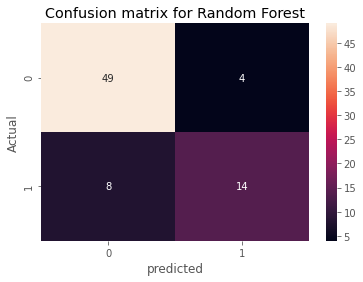

In [52]:
#Visualizing confusion matrix for Random forest
sns.heatmap(cm_RF, annot = True)
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [53]:
print(metrics.classification_report(y_test, predict_RF, target_names = ['No Death 0', 'Death 1']))

              precision    recall  f1-score   support

  No Death 0       0.86      0.92      0.89        53
     Death 1       0.78      0.64      0.70        22

    accuracy                           0.84        75
   macro avg       0.82      0.78      0.80        75
weighted avg       0.84      0.84      0.83        75



Confusion matrix for Random Forest showed 4 false positives and accuracy of the model is 84%.

## Gradient Boosting 

In [54]:
#Create hyperparameters for Gradient hyperparameter tuning
parameters_gb = {'n_estimators':[10, 50, 100, 300, 500],
                'max_features': ['sqrt','log2'],
                'max_depth':[1, 3, 5, 7, 9],
                'learning_rate':[0,0.01,0.03,0.05,0.07,0.1,1],
                'min_samples_split':[100,300,500],
                'min_samples_leaf':[10,30,50]}

In [55]:
#create Gradient Boosting
gb = GradientBoostingClassifier()

In [56]:
#Finding the best parameters through Grid search
#create  grid search using 3 fold cross validation

grid_GB = GridSearchCV(gb, parameters_gb, cv=3,  n_jobs=-1)

#conduct and fit grid search
GB_best = grid_GB.fit(x_train, y_train)

In [57]:
#View best Hyperparameter Values Of Gradient Boosting
print("The best hyper parameters for Gradient Boosting are: {}".format(GB_best.best_params_))
print("The cross val score using the best hyper parameters for  Gradient Boosting is: {}".format(GB_best.best_score_))

The best hyper parameters for Gradient Boosting are: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 100}
The cross val score using the best hyper parameters for  Gradient Boosting is: 0.8748348348348348


In [58]:
#Fitting the best parameters for gradient Boosting
GB_best.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0, 0.01, 0.03, 0.05, 0.07, 0.1, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 30, 50],
                         'min_samples_split': [100, 300, 500],
                         'n_estimators': [10, 50, 100, 300, 500]})

In [59]:
# predictions of target vector by Gradient Boosting
predict_GB= GB_best.predict(x_test)
predict_GB

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
#printing confusion matrix for Gradient Boosting
cm_GB = metrics.confusion_matrix(y_test, predict_GB)

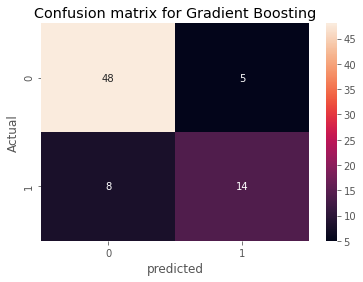

In [61]:
#Visualizing confusion matrix for Gradient Boosting
sns.heatmap(cm_GB, annot = True)
plt.title('Confusion matrix for Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [62]:
print(metrics.classification_report(y_test, predict_GB, target_names = ['No Death 0', 'Death 1']))

              precision    recall  f1-score   support

  No Death 0       0.86      0.91      0.88        53
     Death 1       0.74      0.64      0.68        22

    accuracy                           0.83        75
   macro avg       0.80      0.77      0.78        75
weighted avg       0.82      0.83      0.82        75



##  Model Evaluation - with ROC curve plot

Model performance was evaluated using ROC curve plot. The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.  
It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate and essentially separates the ‘signal’ from the ‘noise’.

False Positive Rate(FPR): It's the ratio of False positives to the actual number of Negatives. In our context,  it was the  measure for how many cases did the model predicted to be dead from all the patients who actually were alive. 
True Positive Rate(TPR): Its the ratio of the True Positives to the actual number of Negatives.In our context, it was the measure for how many patients did the model correctly predicted to be alive from all the alive patients.

In [63]:
# calculate roc curve
fpr_lgr, tpr_lgr, thresholds_lgr_baseline = roc_curve(y_test, predict_lgr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_lr)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, predict_RF)
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_test, predict_GB)

#roc_aoc score
#The AUC for the ROC can be calculated using the roc_auc_score() function
lgr_auc = roc_auc_score(y_test, predict_lgr)
lr_auc = roc_auc_score(y_test, predict_lr)
RF_auc = roc_auc_score(y_test, predict_RF)
GB_auc = roc_auc_score(y_test, predict_GB)

In [64]:
print('AUC for LR_baseline : %.3f' % lgr_auc)
print('AUC for LR: %.3f' % lr_auc)
print('AUC for RF: %.3f' % RF_auc)
print('AUC for GB: %.3f' % GB_auc)


AUC for LR_baseline : 0.735
AUC for LR: 0.729
AUC for RF: 0.780
AUC for GB: 0.771


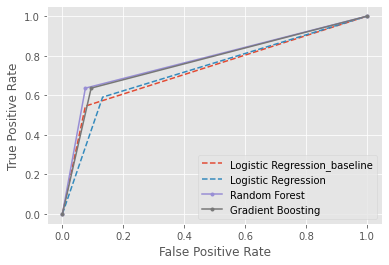

In [65]:

# plot the roc curve for the model
pyplot.plot(fpr_lgr, tpr_lgr, linestyle='--', label='Logistic Regression_baseline')
pyplot.plot(fpr_lr, tpr_lr, linestyle='--', label='Logistic Regression')
pyplot.plot(fpr_RF, tpr_RF, marker='.', label='Random Forest')
pyplot.plot(fpr_GB, tpr_GB, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Random Forest had the best AUC value.

The ROC curve is a very useful tool for a various reasons:

-curves of different models can be compared directly in general or for different thresholds.

-area under the curve (AUC) can be used as a summary of the model skill.

-The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

More specifically:

-Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.

-Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.


Random Forest model had the best area under the curve, hence was selected as best model for deployment.

## Best Model Selection

In [66]:
#best model selected
Best_model = RandomForestClassifier(criterion = 'entropy', max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 9, n_estimators = 100)

In [67]:
Best_model

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=9)

In [68]:
Best_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=9)

In [69]:
y_pred = Best_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8533333333333334

In [71]:
print('Accuracy score for Random Forest was: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score for Random Forest was: 0.8533333333333334


In [73]:
print(metrics.classification_report(y_test, y_pred, target_names = ['No Death 0', 'Death 1']))

              precision    recall  f1-score   support

  No Death 0       0.86      0.94      0.90        53
     Death 1       0.82      0.64      0.72        22

    accuracy                           0.85        75
   macro avg       0.84      0.79      0.81        75
weighted avg       0.85      0.85      0.85        75



##  Conclusion
In machine learning our goal is to minimize Type I (FP) and  Type II errors(FN).In an ideal case, a perfect model should have none of these errors.  However practically no error is impossible and depending on the context we handle these errors differently. 
In our context, we still had 4 FP cases and 8 FN cases. We had accuracy of 85%, recall of 64% and F1 score 72%. 

Our best model would be the one with high specificity and least False Positive Rate which would minimize the possibility of missing patients who need precautionary measures or prophylaxis for heart failure.  

Addition of additional features and additional data might improve model predictions for future studies.